In [1]:
from sklearn.datasets import load_iris
data=load_iris()

In [5]:
X=data['data']
y=data['target_names']

In [15]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import scipy.cluster.hierarchy as shc
import pandas as pd 
import numpy as np

In [26]:
d1=pd.read_csv('https://gist.githubusercontent.com/pravalliyaram/5c05f43d2351249927b8a3f3cc3e5ecf/raw/8bd6144a87988213693754baaa13fb204933282d/Mall_Customers.csv')

In [29]:
d1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [46]:
x1=d1.iloc[:,[3,4]].values
clust=AgglomerativeClustering(n_clusters=5)
yy=clust.fit_predict(x1)

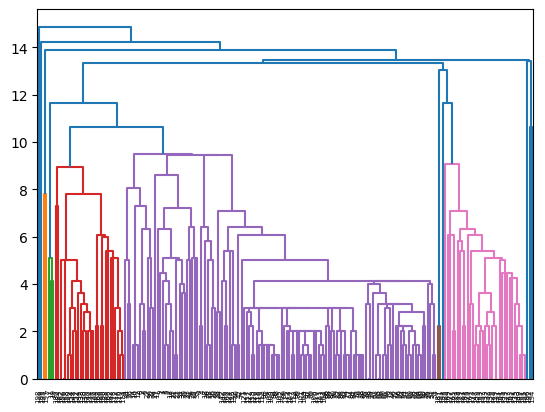

In [47]:
hc=dendrogram(shc.linkage(x1))
import matplotlib.pyplot as plt 
import seaborn as sns

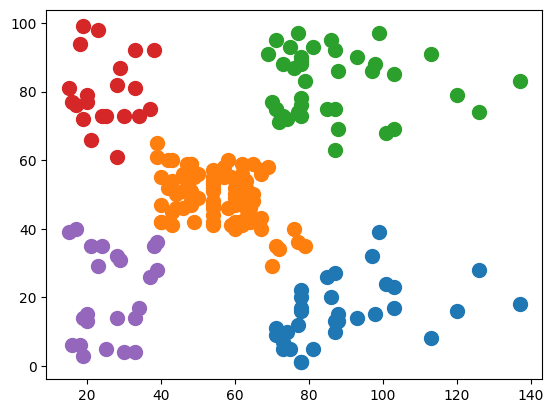

In [48]:
plt.scatter(x1[yy==0,0],x1[yy==0,1],s=100)
plt.scatter(x1[yy==1,0],x1[yy==1,1],s=100)
plt.scatter(x1[yy==2,0],x1[yy==2,1],s=100)
plt.scatter(x1[yy==3,0],x1[yy==3,1],s=100)
plt.scatter(x1[yy==4,0],x1[yy==4,1],s=100)

In [90]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

In [80]:
x2=pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')

In [81]:
y2=x2['variety'].map({'Setosa':0,'Versicolor':1,'Virginica':2}).values
x2=x2.iloc[:,:-1].values


In [94]:
x2,y2=shuffle(x2,y2)
kmm=KMeans(n_clusters=3,random_state=42)
ypred=kmm.fit_predict(x2)

In [95]:
import seaborn as sns

<Axes: >

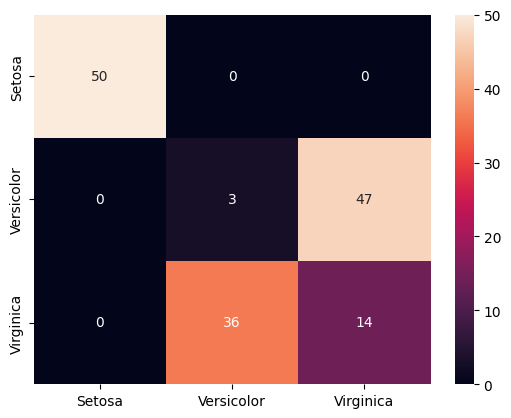

In [96]:
cn=confusion_matrix(y2,ypred)
sns.heatmap(cn,annot=True,fmt='d',xticklabels=['Setosa','Versicolor','Virginica'],yticklabels=['Setosa','Versicolor','Virginica'])

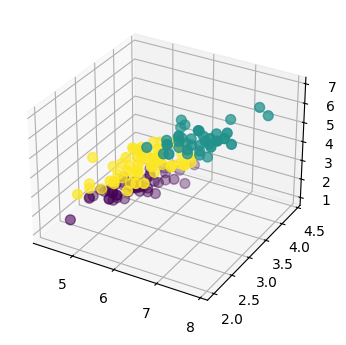

In [117]:
fig=plt.figure(figsize=(4,6))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x2[:,0],x2[:,1],x2[:,2],c=ypred,s=50)

In [128]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection  import train_test_split

In [125]:
data=pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')
data['variety'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [126]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].map({'Setosa':0,'Versicolor':1,'Virginica':2}).values

In [129]:
model=KNeighborsClassifier(n_neighbors=3)

In [134]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [135]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [136]:
y_pred=model.predict(X_test)

In [138]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [139]:
cn=confusion_matrix(y_test,y_pred)
print(cn)

[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


In [146]:
from sklearn.tree import plot_tree,DecisionTreeClassifier
data=pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/refs/heads/master/diabetes.csv')


In [150]:
def entropy(data :pd.DataFrame,target :str): 
    values=data[target].unique()
    ent=0
    for value in values:
        num=len(data[data[target]==value])
        prop=num/len(df)
        ent-=prop*math.log2(prop) if prop!=0 else 0
    return ent
        

In [152]:
def info(data,feature,target): 
    values=data[feature].unique() 
    inf=0
    for value in values: 
        sub=data[data[feature]==value] 
        prop=len(sub)/len(df) 
        inf+=prop*entropy(sub,feature)
    return 0.9-inf
        

In [173]:
model=DecisionTreeClassifier(max_depth=2,criterion='entropy')
model.fit(data.iloc[:,:-1],data.iloc[:,-1])

DecisionTreeClassifier(criterion='entropy', max_depth=2)

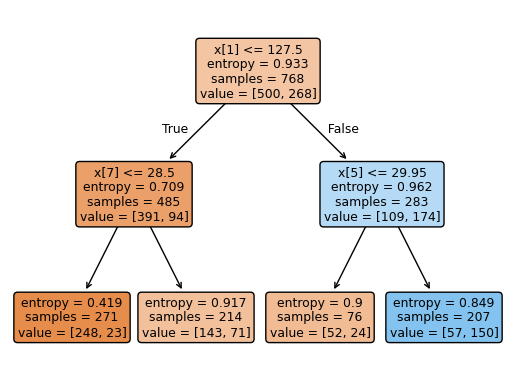

In [174]:
plot_tree(model,  filled=True, rounded=True)
plt.show()

In [161]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [182]:
def id3(data,features,target:'Outcome'): 
    if len(features)==0: 
        return data[target].mode().iloc[0]
    if len(data[target].unique())==1: 
        return data[target].iloc[0]

    bf=max(features,key=lambda x: info(data,x,target))
    features=[f for f in features if f!=bf ]
    tre={bf:{}}
    for value in data[bf].unique(): 
        sub=data[data[bf]==value]
        tre[bf][value]=id3(sub,features,target)
    return tre

In [177]:
data.columns
features=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [185]:
varr=id3(data,features,'Outcome')
for i in varr: 
    print(varr[i])
    print("\n\n\n")
    

{0.627: 1, 0.351: 0, 0.672: 1, 0.167: 0, 2.288: 1, 0.201: 0, 0.248: {'Pregnancies': {3: 1, 1: 0}}, 0.134: 0, 0.158: {'Glucose': {197: 1, 108: 0}}, 0.232: 1, 0.191: 0, 0.537: 1, 1.441: 0, 0.398: 1, 0.587: {'Glucose': {166: 1, 44: 0, 91: 0}}, 0.484: 1, 0.551: {'Pregnancies': {0: 1, 3: 0, 8: 0, 1: 0}}, 0.254: {'Glucose': {107: 1, 143: 1, 187: 1, 122: 0, 161: 0, 124: 1}}, 0.183: {'Pregnancies': {1: 0, 8: 1}}, 0.529: 1, 0.704: 0, 0.388: 0, 0.451: 1, 0.263: {'Pregnancies': {9: 1, 5: 0, 10: 0, 0: 0}}, 0.205: {'Pregnancies': {10: 1, 1: 0, 0: 1}}, 0.257: {'Pregnancies': {7: 1, 2: 0, 13: 1}}, 0.487: 0, 0.245: {'Pregnancies': {13: 0, 10: 0, 6: 1, 5: 0}}, 0.337: {'Pregnancies': {5: 0, 7: 1, 2: 1}}, 0.546: 0, 0.851: 1, 0.267: 0, 0.188: 0, 0.512: 0, 0.966: 0, 0.42: 0, 0.665: 1, 0.503: 1, 1.39: 1, 0.271: 0, 0.696: 0, 0.235: {'Pregnancies': {7: 0, 2: 0, 4: 1}}, 0.721: 1, 0.294: 0, 1.893: 1, 0.564: 0, 0.586: {'Pregnancies': {2: 0, 7: 1}}, 0.344: 1, 0.305: 0, 0.491: 0, 0.526: 0, 0.342: 0, 0.467: 1, 0.71

In [186]:
data=pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')


In [187]:
from sklearn.linear_model import LinearRegression

In [253]:
x=data.iloc[:,:-1].dropna()
y=data.iloc[:,-1].map({'Setosa':0,'Versicolor':1,'Virginica':2})
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)

In [222]:
model = LinearRegression() 
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [223]:
resd=y_pred-y_test


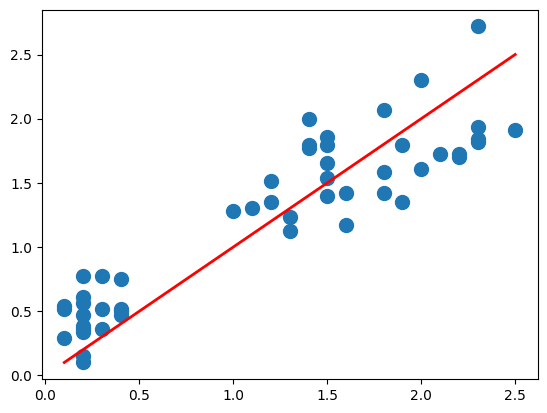

In [224]:
plt.scatter(y_test,y_pred,s=100,alpha=1)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()] ,color='red', lw=2)

<Axes: xlabel='petal.width', ylabel='Count'>

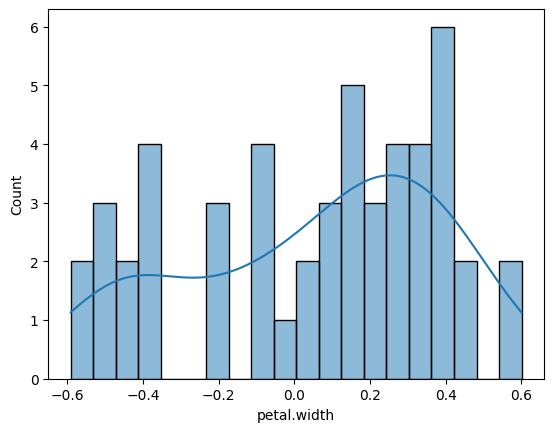

In [226]:
sns.histplot(resd,kde=True,bins=20)

In [227]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm 
from statsmodels.miscmodels.ordinal_model import OrderedModel 

In [251]:
y.head()

0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: variety, dtype: object

In [254]:
omodel=OrderedModel(y,x,distr='logit')
res=omodel.fit(method='bfgs')

Optimization terminated successfully.
         Current function value: 0.039662
         Iterations: 91
         Function evaluations: 107
         Gradient evaluations: 107


In [255]:
y_pred=res.predict()

In [256]:
y_pred=y_pred.argmax(axis=1)

In [257]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [258]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.98      0.98        50
           2       0.98      0.98      0.98        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



In [282]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.datasets import load_breast_cancer,load_iris
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_curve,auc

In [332]:
data=pd.read_csv('https://raw.githubusercontent.com/huzaifsayed/Linear-Regression-Model-for-House-Price-Prediction/refs/heads/master/USA_Housing.csv')

In [333]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [386]:
x=data['Area Population'][:500]
y=data['Price'][:500]

In [387]:
x=x.values.reshape(-1,1)
y=y.values.reshape(-1,1)

In [388]:
x.shape,y.shape

((500, 1), (500, 1))

In [389]:
 X_train, X_test, y_train, y_test = train_test_split(
...     x, y, test_size=0.33, random_state=42)

In [399]:
pmodel=PolynomialFeatures(degree=3)
polyx_train=pmodel.fit_transform(X_train)
polyx_test=pmodel.fit_transform(X_test)


In [391]:
model1=LinearRegression().fit(X_train,y_train)
model2=LinearRegression().fit(polyx_train,y_train)

In [392]:
sortrain=polyx_train.sort()
sorttest=polyx_test.sort()

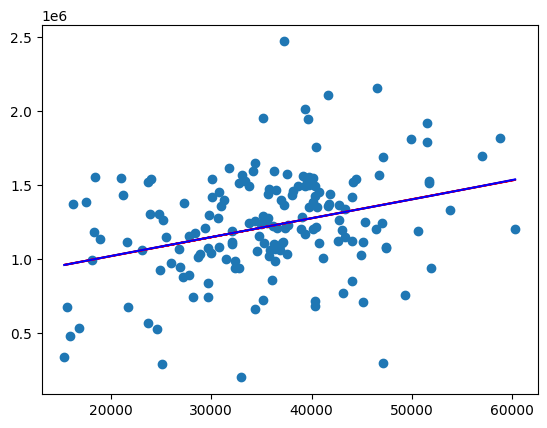

In [401]:
plt.scatter(X_test,y_test)
plt.plot(X_test,model1.predict(X_test),color='red')
plt.plot(np.sort(X_test, axis=0), model2.predict(pmodel.transform(np.sort(X_test, axis=0))), color='blue', label='Polynomial')

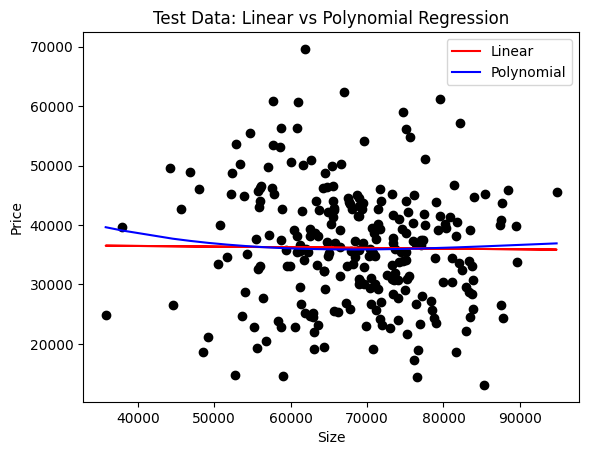

In [407]:
 import matplotlib.pyplot as plt
 import numpy as np
 from sklearn.linear_model import LinearRegression
 from sklearn.preprocessing import PolynomialFeatures
 import pandas as pd
 # Load the data
 # df = pd.read_csv("Housing.csv")
 Y = data['Area Population'].values.reshape(-1, 1)
 X = data['Avg. Area Income'].values.reshape(-1, 1)
 # Split the data into training and testing sets
 X_train, X_test = X[:-250], X[-250:]
 Y_train, Y_test = Y[:-250], Y[-250:]
 # Linear Regression
 lin_reg = LinearRegression()
 lin_reg.fit(X_train, Y_train)
 # Polynomial Regression (degree=3)
 poly_reg = PolynomialFeatures(degree=3)
 X_train_poly = poly_reg.fit_transform(X_train)
 X_test_poly = poly_reg.transform(X_test)
 poly_lin_reg = LinearRegression()
 poly_lin_reg.fit(X_train_poly, Y_train)
 # Plotting
 plt.scatter(X_test, Y_test, color='black')
 plt.plot(X_test, lin_reg.predict(X_test), color='red', label='Linear')
 plt.plot(np.sort(X_test, axis=0), poly_lin_reg.predict(poly_reg.transform(np.sort(X_test, axis=0))), color='blue', label='Polynomial')
 plt.title('Test Data: Linear vs Polynomial Regression')
 plt.xlabel('Size')
 plt.ylabel('Price')
 plt.legend()
 plt.show()

C:\Users\karthik cse\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


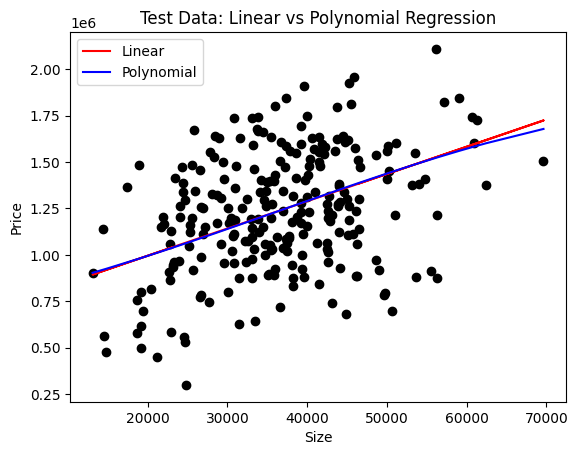

In [405]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

# Load the dataset
# df = pd.read_csv("Housing.csv")
X, Y = data[['Area Population']], data[['Price']]

# Train-test split
X_train, X_test, Y_train, Y_test = X[:-250], X[-250:], Y[:-250], Y[-250:]

# Linear Regression
lin_reg = LinearRegression().fit(X_train, Y_train)

# Polynomial Regression (degree=3)
poly_reg = PolynomialFeatures(degree=3)
poly_lin_reg = LinearRegression().fit(poly_reg.fit_transform(X_train), Y_train)

# Plot results
plt.scatter(X_test, Y_test, color='black')
plt.plot(X_test, lin_reg.predict(X_test), 'r', label='Linear')
plt.plot(np.sort(X_test, axis=0), poly_lin_reg.predict(poly_reg.transform(np.sort(X_test, axis=0))), 'b', label='Polynomial')
plt.title('Test Data: Linear vs Polynomial Regression')
plt.xlabel('Size')
plt.ylabel('Price')
plt.legend()
plt.show()


In [408]:
data=load_breast_cancer()

In [411]:
x=data['data']
y=data['target']
X_train, X_test, y_train, y_test = train_test_split(   x, y, test_size=0.33, random_state=42)

In [412]:
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\karthik cse\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [413]:
fpr,tpr,_ = roc_curve(y_test,model.predict(X_test))

Text(0, 0.5, 'True positive rate')

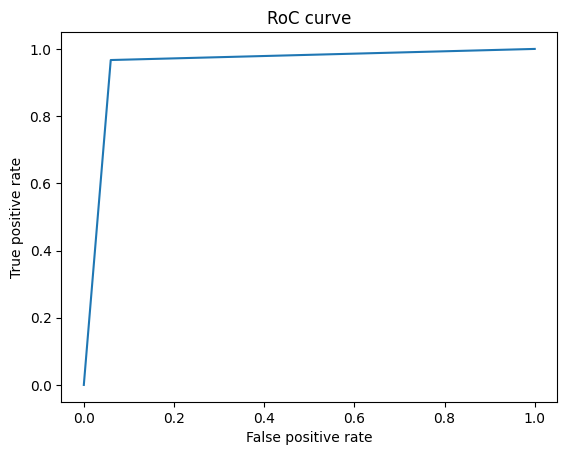

In [415]:
plt.plot(fpr,tpr)
plt.title('RoC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

In [419]:
from sklearn.metrics import precision_recall_curve

In [422]:
pr,re,_=precision_recall_curve(y_test,model.predict(X_test))

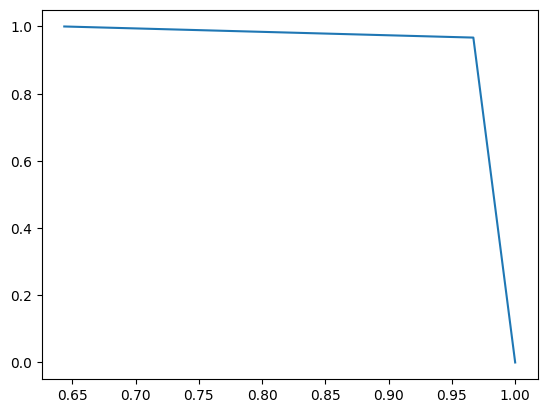

In [423]:
plt.plot(pr,re)

In [424]:
from scipy.stats import pearsonr,spearmanr
import statsmodels.api as sm 

In [429]:
data1=np.random.randn(100)
data2=data1+np.random.randn(100)*0.7

In [430]:
coef=pearsonr(data1,data2)

In [431]:
coef

PearsonRResult(statistic=0.8383118499129327, pvalue=1.4513323313609638e-27)

In [432]:
spearmanr(data1,data2)

SignificanceResult(statistic=0.8210021002100208, pvalue=1.3600650364697623e-25)

In [606]:
datas=load_iris()['data']

In [607]:
datas=pd.DataFrame(datas)

In [608]:
datas.corr()

,0,1,2,3
0,1.000000,-0.117570,0.871754,0.817941
1,-0.117570,1.000000,-0.428440,-0.366126
2,0.871754,-0.428440,1.000000,0.962865
3,0.817941,-0.366126,0.962865,1.000000


In [609]:
np.corrcoef(data1,data2)

array([[1.        , 0.83831185],
       [0.83831185, 1.        ]])

In [460]:
t=np.arange(0,10,0.1)
sig1=np.sin(4*math.pi*t)+np.cos(6*math.pi*t)+np.random.normal(100)
sig2=np.sin(4*math.pi*t)+np.cos(6*math.pi*t)+np.random.normal(100)


In [461]:
model=sm.OLS(sig1,sig2).fit()

In [462]:
model.rsquared

0.9999999991532654

In [610]:
datas.columns

RangeIndex(start=0, stop=4, step=1)

<Axes: xlabel='0', ylabel='Count'>

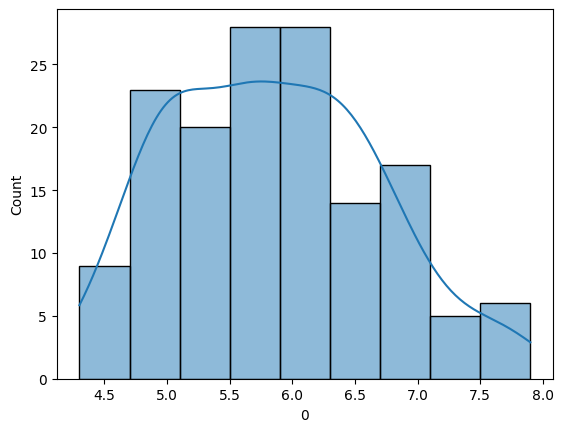

In [469]:
sns.histplot(datas,x=0,kde=True)

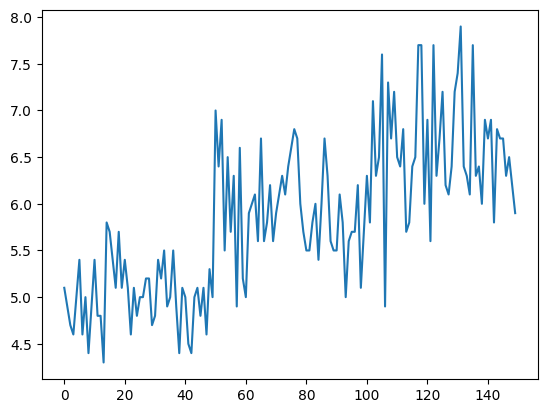

In [471]:
plt.plot(datas[0])

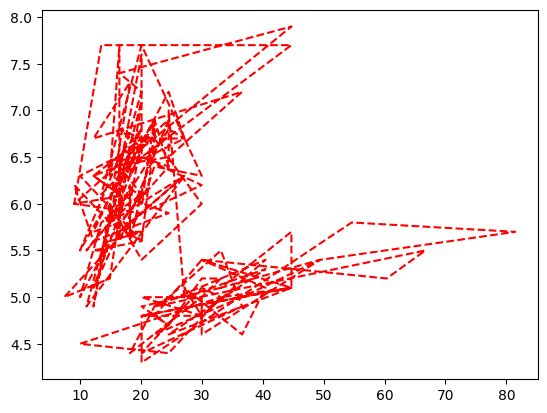

In [483]:
ex=np.exp(datas[1])
plt.plot(ex,datas[0],linestyle='--',color='red')

<Axes: xlabel='0', ylabel='Count'>

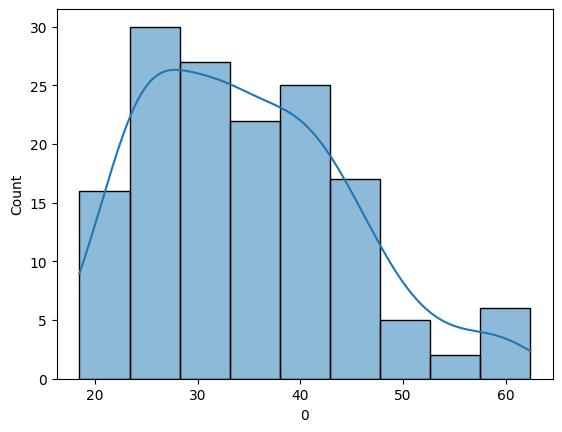

In [484]:
datas[0]=datas[0]**2
sns.histplot(datas,x=0,kde=True)

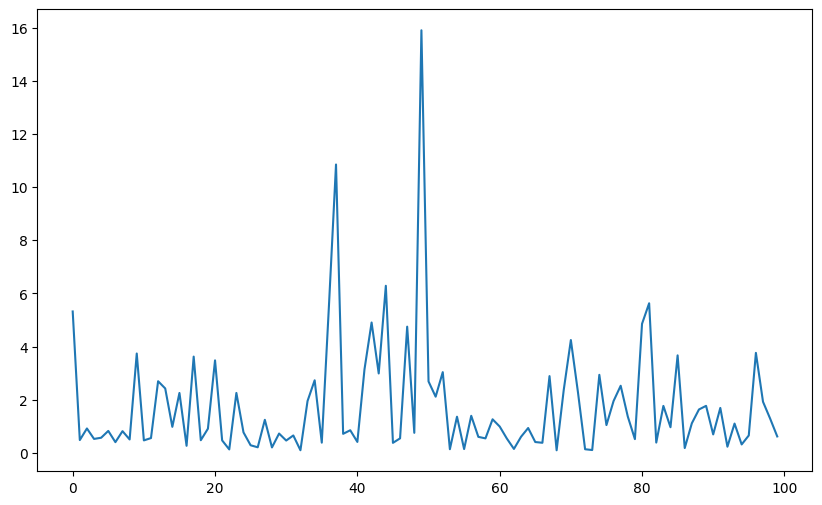

In [487]:
plt.figure(figsize=(10,6))
plt.plot(np.exp(np.random.randn(100)))

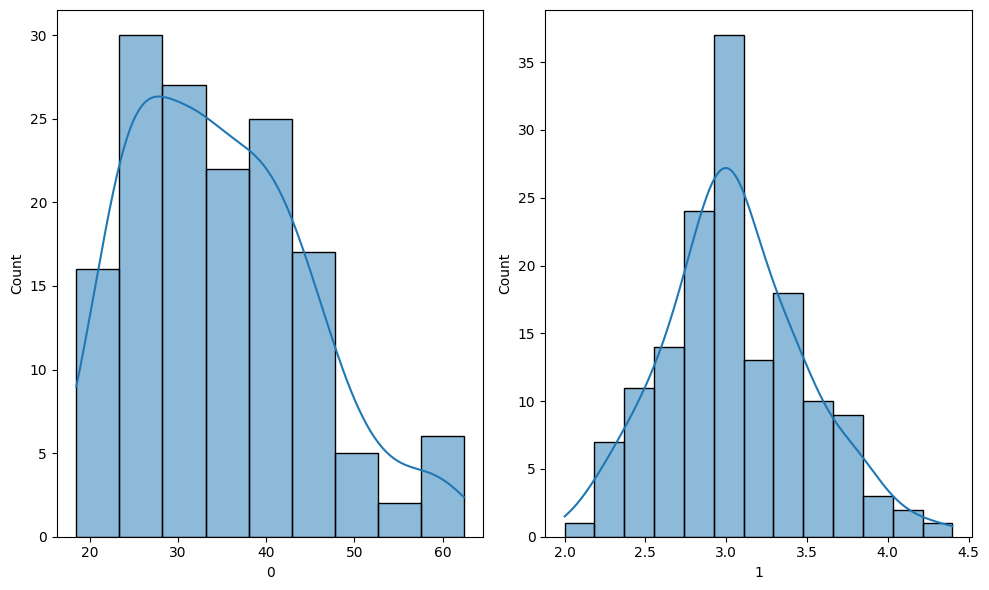

In [493]:
fig=plt.figure(figsize=(10,6))
fig.add_subplot(1,2,1)
sns.histplot(datas,x=0,kde=True)
fig.add_subplot(1,2,2)
sns.histplot(datas,x=1,kde=True)
plt.tight_layout()

<Axes: xlabel='0', ylabel='1'>

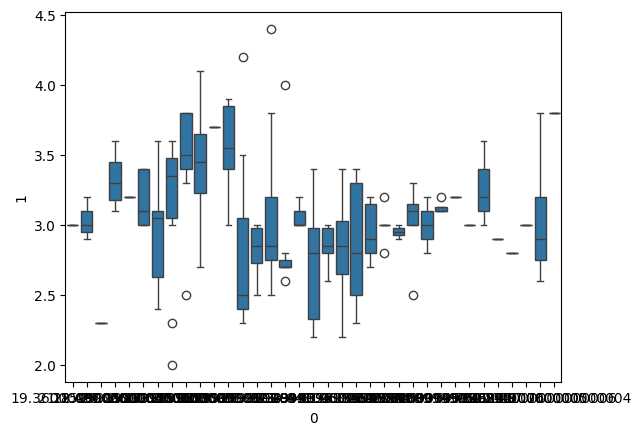

In [490]:
sns.boxplot(datas,x=0,y=1)

<Axes: xlabel='0', ylabel='1'>

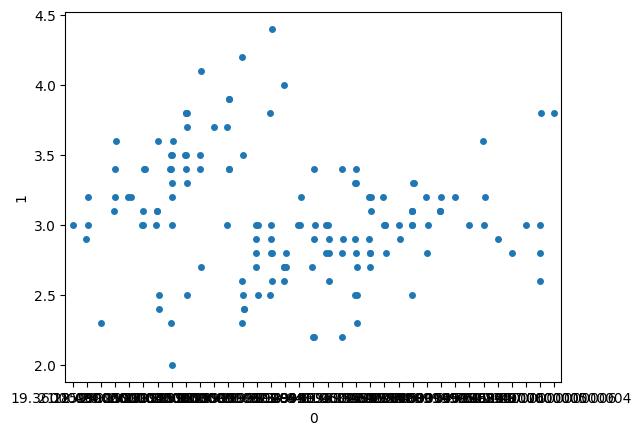

In [491]:
sns.stripplot(datas,x=0,y=1)

C:\Users\karthik cse\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\karthik cse\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\karthik cse\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\karthik cse\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use strip

<Axes: xlabel='0', ylabel='1'>

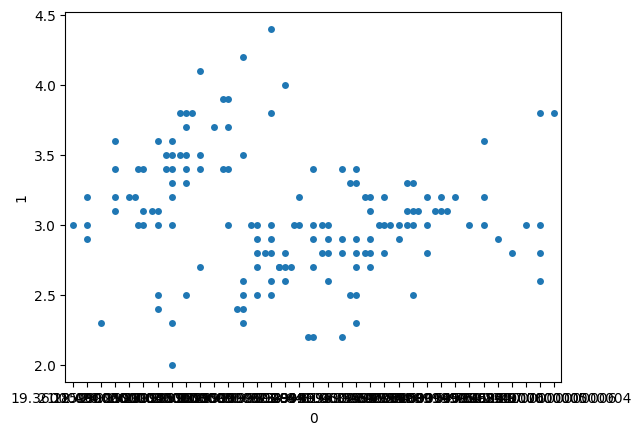

In [492]:
sns.swarmplot(datas,x=0,y=1)

In [613]:
target=load_iris()['target'].reshape(-1,1)
datas=np.concatenate((datas,target),axis=1)

In [614]:
datas.shape,target.shape,type(datas)
datas=pd.DataFrame(datas)
datas.columns=['col1','col2','col3','col4','col5','col6','col7']
datas.head()

ValueError: Length mismatch: Expected axis has 6 elements, new values have 7 elements

<Axes: xlabel='col7', ylabel='count'>

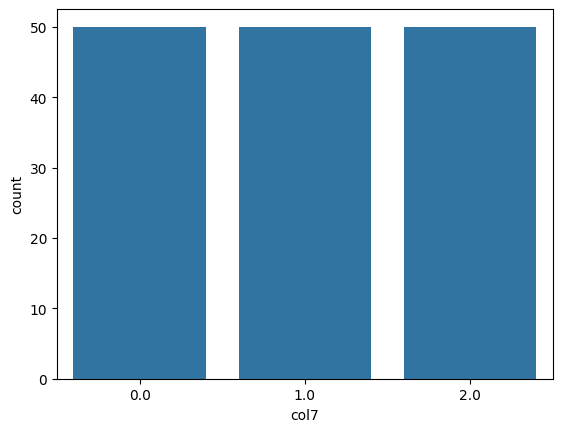

In [542]:
sns.countplot(datas,x='col7')

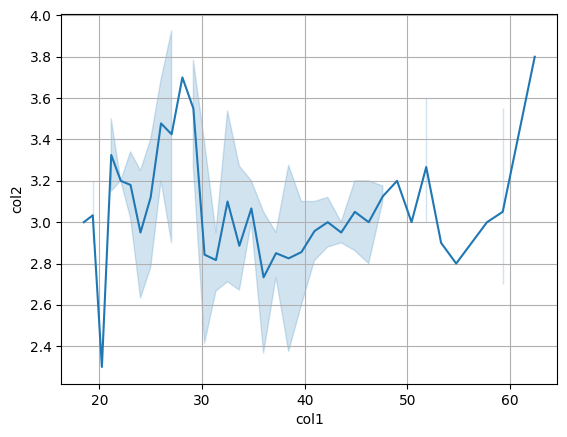

In [544]:
sns.lineplot(datas,x='col1',y='col2')
plt.grid()

<Axes: xlabel='col1', ylabel='col2'>

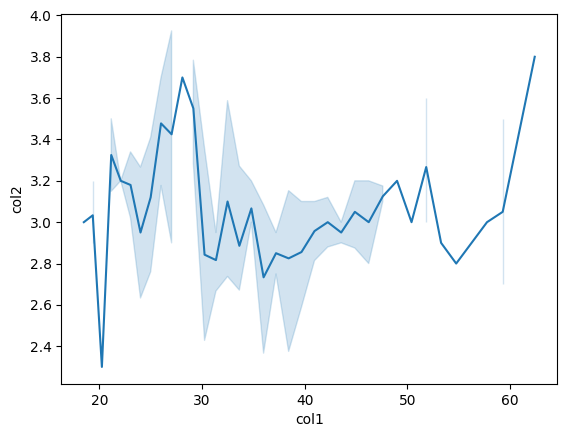

In [545]:
sns.lineplot(datas,x='col1',y='col2')


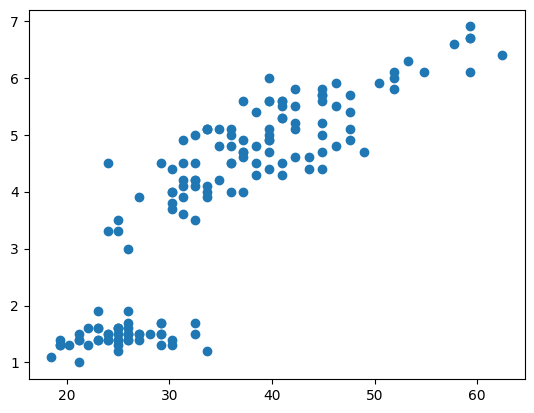

In [551]:
plt.scatter(datas['col1'],datas['col3'])

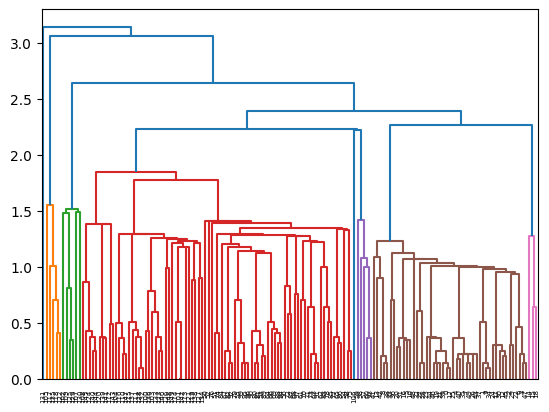

In [555]:
from scipy.cluster.hierarchy import dendrogram,linkage
linkage=linkage(datas,'single')
linked=dendrogram(linkage)

<Axes: xlabel='col1', ylabel='Count'>

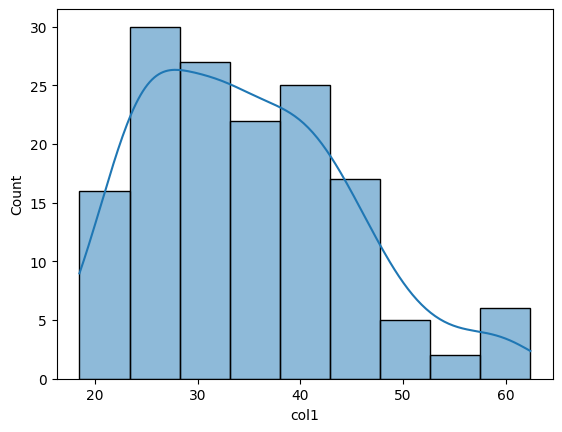

In [557]:
sns.histplot(datas,x='col1',kde=True)

In [560]:
res=datas['col7'].value_counts()

([<matplotlib.patches.Wedge at 0x1ba18443990>,
 [Text(0.5499999702695115, 0.9526279613277875, 'setosa'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'vescular'),
  Text(0.5500001486524352, -0.9526278583383436, 'nig')])

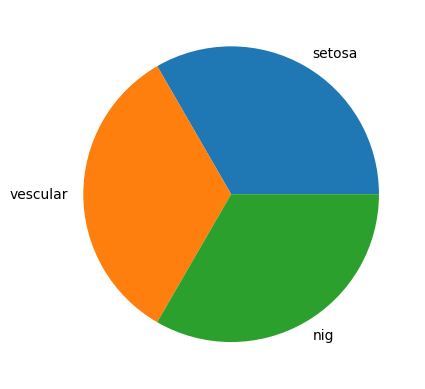

In [561]:
plt.pie(res,labels=['setosa','vescular','nig'])

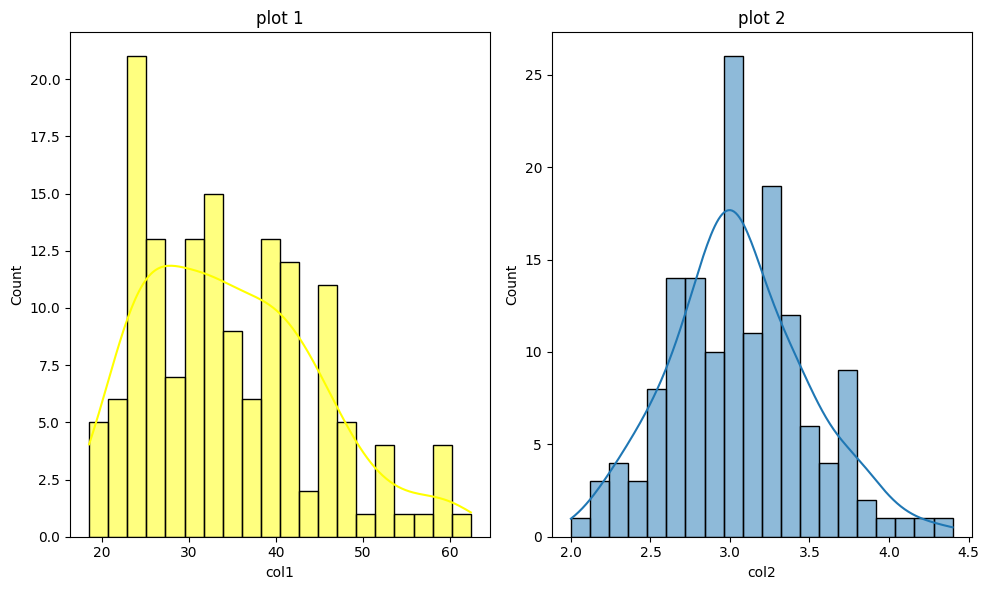

In [568]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(datas,x='col1',kde=True,color='yellow',bins=20)
plt.title('plot 1')
plt.subplot(1,2,2)
sns.histplot(datas,x='col2',kde=True,bins=20)
plt.title('plot 2')
plt.tight_layout() 
plt.show()

In [569]:
datas['col7'].value_counts()

col7
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64

In [572]:
pd.crosstab(index=datas['col7'],columns='values')

col_0,values
col7,
0.0,50
1.0,50
2.0,50


In [573]:
pd.crosstab(index=datas['col1'],columns=datas['col7'])

col7,0.0,1.0,2.0
col1,,,
18.49,1,0,0
19.36,3,0,0
20.25,1,0,0
21.16,4,0,0
22.09,2,0,0
23.04,5,0,0
24.01,4,1,1
25.00,8,2,0
26.01,8,1,0


In [575]:
datas['col5'].mean(),datas['col5'].var()

(1.0, 0.6711409395973155)

In [576]:
datas['col3'].std()

1.7652982332594662

In [584]:
ar={'col1':1,'col2':1,'col3':2,'col4':1,'col5':1,'col6':2,'col7':1}

In [579]:
datas.shape

(150, 7)

In [587]:
datas.loc[150]=ar

In [591]:
datas.shape

(150, 7)

In [590]:
datas.drop(index=150,inplace=True)

In [601]:
datas['col1']=[i*0.8+7 for i in range(150)]

TypeError: list indices must be integers or slices, not str

In [603]:
datas.head()

AttributeError: 'list' object has no attribute 'head'